In [86]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd

/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


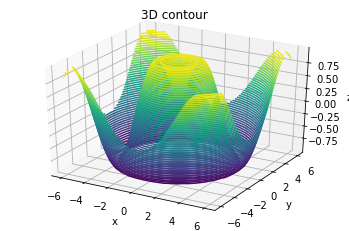

In [2]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d', )
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

In [3]:
x

array([-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
       -3.93103448, -3.51724138, -3.10344828, -2.68965517, -2.27586207,
       -1.86206897, -1.44827586, -1.03448276, -0.62068966, -0.20689655,
        0.20689655,  0.62068966,  1.03448276,  1.44827586,  1.86206897,
        2.27586207,  2.68965517,  3.10344828,  3.51724138,  3.93103448,
        4.34482759,  4.75862069,  5.17241379,  5.5862069 ,  6.        ])

## Setting Up

In [46]:
Osat = 8

u = 0.8
v = .4

Dx = 0.5
Dy = 0.5
Kr = 0.01
Kd = 0.01
Ka = 0.02

Qs = 750

In [47]:
L = 90
W = 20

In [48]:
dx = 0.45
dy = 0.45
dt = 0.1

In [49]:
Nx = int(L/dx)+1
Ny = int(W/dy)+1
print(Nx, Ny)

201 45


In [50]:
r = Dx * dt/dx**2
r

0.24691358024691357

## Courant Number and Peclet Number Limit

Courant Number regulates information flow. Says information can not propagate for wave motion faster than space

In [51]:
Cr = u*dt/dx + v*dt/dy
Cr

0.2666666666666667

Peclet Number is ratio of advection to diffusion

In [52]:
P = Cr/r
P

1.0800000000000003

# Plotting

In [11]:
import seaborn as sns

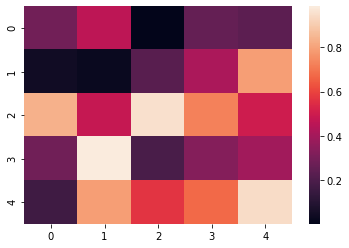

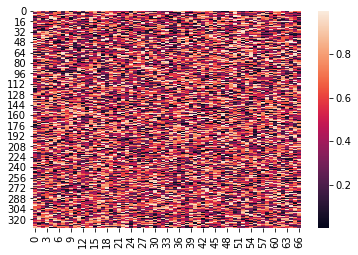

In [12]:
plt.figure()
ax = sns.heatmap(np.random.rand(5,5))
#ax.fig.close()
plt.figure()
ax2 = sns.heatmap(np.random.rand(Nx,Ny))


In [13]:
L/dx

333.3333333333333

In [14]:
Nx = int(L/dx)+1
Ny = int(W/dy)+1
print(Nx, Ny)

334 67


In [64]:
xi = np.linspace(0,L, Nx)
yi = np.linspace(0,W, Ny)
np.meshgrid(yi,xi)

X, Y = np.meshgrid(xi,yi)
Z = np.sin(X+Y) # (5x12)

/Users/sgrawal/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


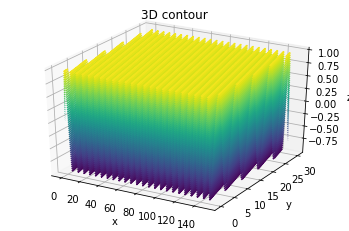

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d', )
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

In [18]:
def get_point(x, y, Z):
    return(Z[int((x/dx)+0.01), int(int((y/dy)+0.01))])

# Evolving

In [53]:
O = Osat * np.ones((Nx, Ny))
Os = [O, O]
B = np.zeros((Nx, Ny))
Bs = [B, B]


In [54]:
Os

[array([[8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        ...,
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.]]),
 array([[8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        ...,
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.],
        [8., 8., 8., ..., 8., 8., 8.]])]

In [55]:
def my_add(lis, item):
    return([lis[-1], item])

In [59]:
Nx = int(L/dx)+1
Ny = int(W/dy)+1

Os = [Osat * np.ones((Nx, Ny))]
Bs = [np.zeros((Nx, Ny))]


xo = int(Nx/2) # INDICES NOT POINT
yo = int(Ny/2)

t = 0

if((Cr**2 <= r <=.25 ) and P<=2):
    while(t<100):
        On_1 = Osat * np.ones((Nx, Ny))
        Bn_1 = np.zeros((Nx, Ny))

        for x in range(1,Nx):
            for y in range(Ny):
                RB = Bs[-1][x+1, y] if(x!=(Nx-1)) else Bs[-1][-2, y]
                LB = Bs[-1][x-1, y]
                UB = Bs[-1][x, y+1] if (y!=(Ny-1)) else Bs[-1][x, -2]
                DB = Bs[-1][x, y-1] if(y!=0) else Bs[-1][x, 1]
                CB = Bs[-1][x, y]

                RO = Os[-1][x+1, y] if(x!=(Nx-1)) else Os[-1][-2, y]
                LO = Os[-1][x-1, y]
                UO = Os[-1][x, y+1] if (y!=(Ny-1)) else Os[-1][x, -2]
                DO = Os[-1][x, y-1] if (y!=0) else Os[-1][x, 1]
                CO = Os[-1][x, y]

                temp = (Dx/dx**2)*(RB - 2*CB + LB) + (Dy/dy**2)*(UB - 2*CB + DB)
                delta = (Qs*dt/(dx*dy)) if(x==xo and y==yo) else 0
                Bnew = temp - Kr*CB + delta - (u/(2*dx))*(RB - LB) - (v/(2*dy))*(UB - DB)
                
                Bn_1[x, y] = dt*Bnew + CB


                temp = (Dx/dx**2)*(RO - 2*CO + LO) + (Dy/dy**2)*(UO - 2*CO + DO)
                
                Onew = temp - Kd*CB + Ka*(Osat-CO) - (u/(2*dx))*(RO - LO) - (v/(2*dy)) * (UO - DO)
                On_1[x, y] = dt*Onew + CO
                
                
        #plt.figure()
        #ax = sns.heatmap(Bn_1)        

        
        
        Os = [On_1]
        Bs = [Bn_1]
        #Os = my_add(Os,On_1)
        #Bs = my_add(Bs, Bn_1)

        if (t % 1 < 0.01):
            print(t)
        
        t += dt
        
else:
    print("Unstable Parameters")


0
19.0


In [ ]:
p

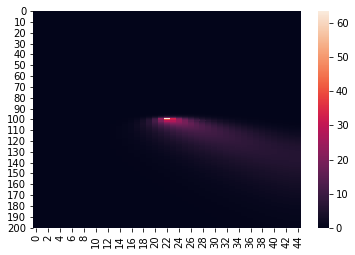

In [85]:
sns.heatmap(Bs[0])

In [69]:
Ny

45

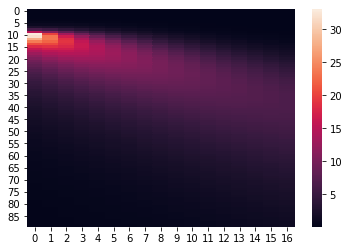

In [81]:
sns.heatmap(Bs[0][90:180, 23:-5])

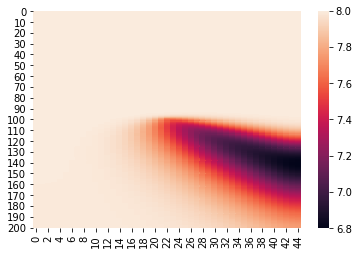

In [84]:
sns.heatmap(Os[0])

In [91]:
c2 = pd.DataFrame(Bs[0])
c2.to_csv("u.8,v.4,Q.750.csv")
c2a = pd.DataFrame(Os[0])
c2a.to_csv("Oxygen: u.8,v.4,Q.750.csv")

In [58]:
1.0 % 1

0.0

In [30]:
t_100 = pd.DataFrame(Bs[0])

In [31]:
t_100.to_csv('t_100.csv')

In [ ]:
sns.heat

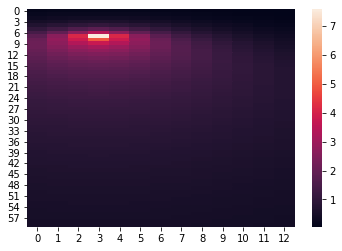

In [39]:
sns.heatmap(Bs[0][160:220, 30:43])

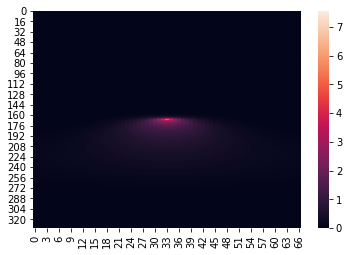

In [25]:
sns.heatmap(Bs[0]) #t=100

In [42]:
Nx = 12
Ny = 5
O = Osat * np.ones((Nx, Ny))
Os = [O, O]
B = np.zeros((Nx, Ny))
Bs = [B, B]


xo = int(Nx/2) # INDICES NOT POINT
yo = int(Ny/2)

t = 0
print(O)


if((Cr**2 <= r <=.25 ) and P<=2):
    while(t<.3):
        On_1 = Osat * np.ones((Nx, Ny))
        Bn_1 = np.zeros((Nx, Ny))

        for x in range(1,Nx):
            for y in range(Ny):
                RB = Bs[-1][x+1, y] if(x!=(Nx-1)) else Bs[-1][-2, y]
                LB = Bs[-1][x-1, y]
                UB = Bs[-1][x, y+1] if (y!=(Ny-1)) else Bs[-1][x, -2]
                DB = Bs[-1][x, y-1] if(y!=0) else Bs[-1][x, 1]
                CB = Bs[-1][x, y]

                RO = Os[-1][x+1, y] if(x!=(Nx-1)) else Os[-1][-2, y]
                LO = Os[-1][x-1, y]
                UO = Os[-1][x, y+1] if (y!=(Ny-1)) else Os[-1][x, -2]
                DO = Os[-1][x, y-1] if (y!=0) else Os[-1][x, 1]
                CO = Os[-1][x, y]

                temp = (Dx/dx**2)*(RB - 2*CB + LB) + (Dy/dy**2)*(UB - 2*CB + DB)
                delta = (Qs*dt/(dx*dy)) if(x==xo and y==yo) else 0
                Bnew = temp - Kr*CB + delta - (u/(2*dx))*(RB - LB) - (v/(2*dy))*(UB - DB)
                print(x,",",y, ": ", temp, " ", Bnew, " ", dt*Bnew + CB)
                print(UB,LB, RB, LB)
                
                Bn_1[x, y] = dt*Bnew + CB


                temp = (Dx/dx**2)*(RO - 2*CO + LO) + (Dy/dy**2)*(UO - 2*CO + DO)
                print("Onew diffusion sum: ", Onew)
                Onew = temp - Kd*CB + Ka*(Osat-CO) - (u/(2*dx))*(RO - LO) - (v/(2*dy)) * (UO - DO)
                print(Onew)
                print("Onew: ", dt*Onew + CO)
                On_1[x, y] = dt*Onew + CO
                print()
                 
                
        print()
        print()
        print(On_1)
        print(Bn_1)
        print()
        Os = my_add(Os,On_1)
        Bs = my_add(Bs, Bn_1)

        t += dt
else:
    print("Unstable Parameters")


[[8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]]
1 , 0 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

1 , 1 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

1 , 2 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

1 , 3 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

1 , 4 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

2 , 0 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

2 , 1 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

2 , 2 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

2 , 3 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

2 , 4 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew

10 , 1 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

10 , 2 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

10 , 3 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

10 , 4 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

11 , 0 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

11 , 1 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

11 , 2 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

11 , 3 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0

11 , 4 :  0.0   0.0   0.0
0.0 0.0 0.0 0.0
Onew diffusion sum:  0.0
0.0
Onew:  8.0



[[8.         8.         8.         8.         8.        ]
 [8.         8.         8.         8.         8.        ]
 [8.         8.         8.         8.         8.        ]
 [8.         8.         8.         8.         8.        ]
 [8.         8.    

In [32]:
F = np.arange(25).reshape((5,5))
F[:,-1] = F[:,-2]
F

array([[ 0,  1,  2,  3,  3],
       [ 5,  6,  7,  8,  8],
       [10, 11, 12, 13, 13],
       [15, 16, 17, 18, 18],
       [20, 21, 22, 23, 23]])

In [54]:
a = [1,2,3,4]
i=3
asdf = a[i] if(i<len(a)) else a[0]
asdf

4